In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import sqlite3
import pickle
import copy
import json
import math
import pandas as pd
import os

In [2]:
filtered_data = []
counter = 0

search_term = "keyword"
json_input = "json_data/keyword_search_data_20211217_no_guided.json"

for line in open(json_input, 'r'):
#     print(counter)
    tmp_data = json.loads(line)
    assignee_check = tmp_data['assignee_harmonized']
#     print(assignee_check)
    if len(assignee_check) > 0:
        assignee = tmp_data['assignee_harmonized'][0]['name']
    else: 
        assignee = '' 
    date = tmp_data['publication_date'][:4]
    country = tmp_data['country_code']
    pub = tmp_data['publication_number']
    counter += 1
    
    filtered_data.append([pub, date, country, assignee])

In [3]:
len(filtered_data)

32269

In [4]:
# put the data into a dataframe
df = pd.DataFrame(filtered_data)
df.columns = ["pub", "year", "country", "assignee"]

In [5]:
df.shape # with duplicates

(32269, 4)

In [6]:
df = df.drop_duplicates().reset_index(drop=True)

In [7]:
df.shape # no duplicates

(11093, 4)

In [8]:
df.tail()

,pub,year,country,assignee
11088,US-3575577-A,1971,US,LUNAR ELECTRONICS INC
11089,ES-348891-A1,1969,ES,CERAMICA F MARAZZI S P A
11090,GB-1112920-A,1968,GB,HARTMAN METAL FABRICATORS INC
11091,GB-705154-A,1954,GB,ELECTRO PNEUMATIC LOOMS LTD
11092,GB-478375-A,1938,GB,SACO LOWELL SHOPS


In [9]:
# reduce to totals and get count 
df_total = df.groupby(['country']).size().reset_index(name='count').sort_values(by='count',ascending=False)

In [10]:
# drop any rows with no entry for assignee
df_total = df_total[df_total.country != ""]

In [11]:
df_total.head()

,country,count
9,CN,3256
52,US,2445
29,JP,1425
54,WO,926
30,KR,704


In [12]:
df_total.shape

(55, 2)

In [13]:
# also make a set of data with totals by year
dfa = df.groupby(["year", "country"]).size().reset_index(name="count").sort_values(by=['year'],ascending=[True])

In [14]:
# convert to datetime data type
dfa["year"] = pd.to_datetime(dfa["year"], format='%Y')

In [15]:
dfa.dtypes

year       datetime64[ns]
country            object
count               int64
dtype: object

In [16]:
dfa.shape

(634, 3)

In [17]:
dfa.head()

,year,country,count
0,1938-01-01,GB,1
1,1954-01-01,GB,1
2,1968-01-01,GB,1
3,1969-01-01,ES,1
4,1971-01-01,US,3


In [18]:
dfa.tail()

,year,country,count
610,2021-01-01,BG,1
609,2021-01-01,AU,31
608,2021-01-01,AT,2
619,2021-01-01,FI,2
633,2021-01-01,WO,84


In [19]:
dfa.count()

year       634
country    634
count      634
dtype: int64

In [20]:
# test plot

# fig, ax = plt.subplots()
# dfa[dfa['assignee'] == 'AUTOSTORE TECH AS'].plot(x='year', y='count', ax=ax, legend=False)
# # ax.set_xlim([-10, 5])
# ax.set_title("AutoStore")

In [21]:
# another test plot

# fig, ax = plt.subplots()
# dfa[dfa['assignee'] == 'MURATA MACHINERY LTD'].plot(x='year', y='count', ax=ax, legend=False)
# ax.set_title("Murata")

In [22]:
# get a list of the assignees in order
ordered = df_total.set_index("country").index

In [23]:
ordered

Index(['CN', 'US', 'JP', 'WO', 'KR', 'EP', 'DE', 'CA', 'TW', 'AU', 'BR', 'RU',
       'ES', 'GB', 'MX', 'AT', 'FR', 'SU', 'SG', 'NO', 'PL', 'NZ', 'CS', 'FI',
       'SK', 'IT', 'CZ', 'DD', 'AR', 'IE', 'UA', 'EA', 'PH', 'BG', 'CH', 'NL',
       'BE', 'CL', 'HU', 'RO', 'LT', 'DK', 'PT', 'PE', 'MY', 'TN', 'TR', 'HK',
       'CY', 'SE', 'CO', 'GR', 'MA', 'UY', 'IL'],
      dtype='object', name='country')

          year country  count
79  1988-01-01      CN      1
96  1990-01-01      CN      2
107 1991-01-01      CN      2
116 1992-01-01      CN      1
129 1993-01-01      CN      1
140 1994-01-01      CN      1
153 1995-01-01      CN      1
166 1996-01-01      CN      4
182 1997-01-01      CN      3
195 1998-01-01      CN      2
205 1999-01-01      CN      3
217 2000-01-01      CN      2
232 2001-01-01      CN      4
244 2002-01-01      CN      5
257 2003-01-01      CN      8
278 2004-01-01      CN      6
295 2005-01-01      CN     11
310 2006-01-01      CN     10
326 2007-01-01      CN     12
341 2008-01-01      CN     28
359 2009-01-01      CN     47
375 2010-01-01      CN     54
393 2011-01-01      CN     80
413 2012-01-01      CN    140
432 2013-01-01      CN    172
453 2014-01-01      CN    145
475 2015-01-01      CN    165
494 2016-01-01      CN    201
522 2017-01-01      CN    226
542 2018-01-01      CN    278
568 2019-01-01      CN    373
592 2020-01-01      CN    628
614 2021-0

          year country  count
409 2012-01-01      AU      2
429 2013-01-01      AU      5
448 2014-01-01      AU      3
472 2015-01-01      AU      4
491 2016-01-01      AU      9
518 2017-01-01      AU     12
539 2018-01-01      AU     18
562 2019-01-01      AU     17
588 2020-01-01      AU     17
609 2021-01-01      AU     31
          year country  count
230 2001-01-01      BR      1
255 2003-01-01      BR      3
276 2004-01-01      BR      1
293 2005-01-01      BR      5
308 2006-01-01      BR      1
324 2007-01-01      BR      3
339 2008-01-01      BR      4
357 2009-01-01      BR      2
373 2010-01-01      BR      2
391 2011-01-01      BR      6
410 2012-01-01      BR      2
430 2013-01-01      BR      6
450 2014-01-01      BR      6
473 2015-01-01      BR      3
492 2016-01-01      BR      8
519 2017-01-01      BR      7
540 2018-01-01      BR      6
565 2019-01-01      BR      4
589 2020-01-01      BR     13
611 2021-01-01      BR     11
          year country  count
136 1993-0

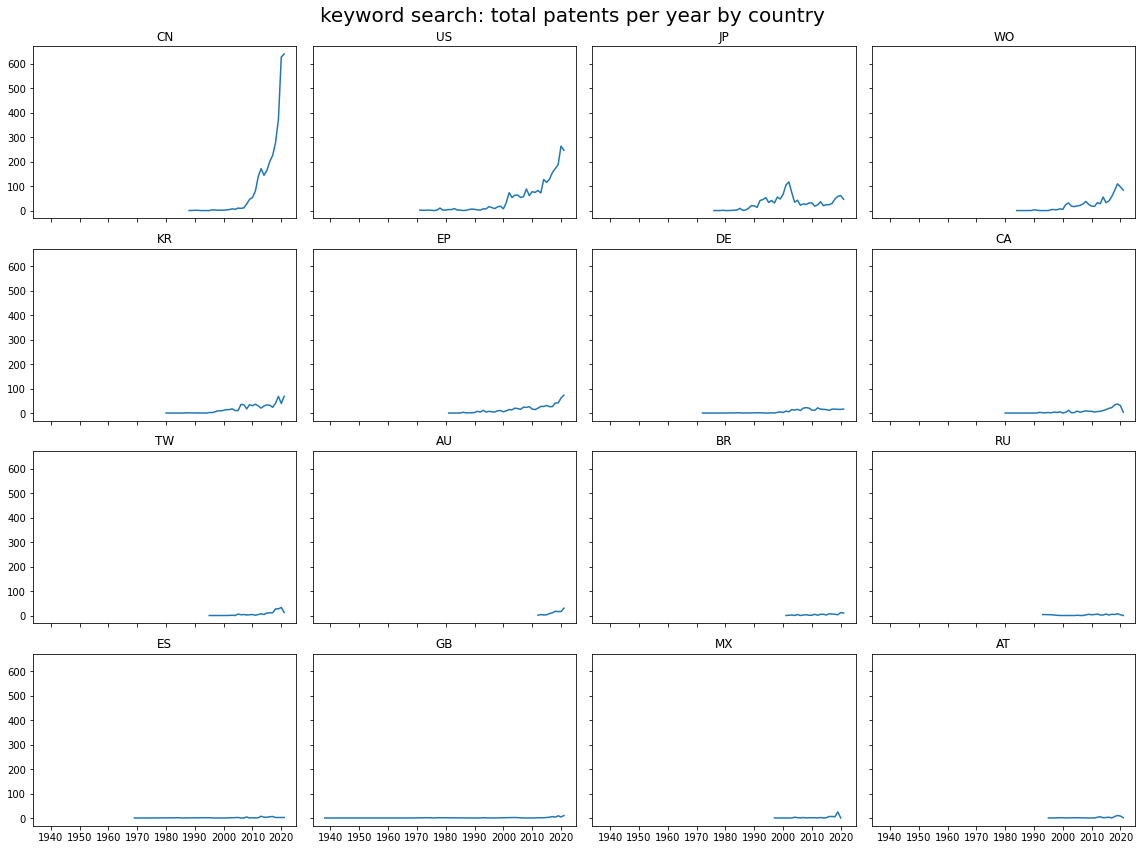

In [25]:
xdim = 4
ydim = 4
fig, ax = plt.subplots(nrows=ydim, ncols=xdim, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.set_size_inches(16, 12)

fig.suptitle(f'{search_term} search: total patents per year by country', size=20)

for i in range(ydim):
    for j in range(xdim):
        idx = (i * xdim) + j
#     for target_assignee in ordered_assignees[1:17]:
    #     print(target_assignee)
    #     selection = dfa.get_group(countryname)
        selection = dfa[dfa['country'] == ordered[idx]].sort_values(by=['year'],ascending=[True])
#         .sort_values(by=['year'],ascending=[True])
#         print(selection)

#         ax = axes_list.pop(0)
    #     print(minyear, maxyear, maxpat)

#         print(selection["year"].iloc[0])
#         ax[i,j].axis([int(selection["year"].iloc[0]) - minyear, 
#                       int(selection["year"].iloc[-1]) + maxyear - minyear,
#                       0, maxpat])
        ax[i,j].set_title(ordered[idx])
#         selection.plot(x='year', y='count', label=ordered_assignees[idx], ax=ax[i,j], legend=False)
        ax[i,j].plot(selection["year"], selection["count"])

plt.tight_layout()

In [92]:
filename = f'plot_{search_term}_top_country_year_'
# filename = f'plot_{search_term}_top_assignees_year_no_amazon_'
i = 0
while os.path.exists(filename+"%s" % i):
    i += 1
filename += str(i)+".jpg"
print(filename)
fig.savefig(filename, dpi=300)

plot_keyword_top_country_year_0.jpg
